Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 102ms/step - accuracy: 0.2931 - loss: 1.9132 - val_accuracy: 0.4389 - val_loss: 1.5369
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 98ms/step - accuracy: 0.4382 - loss: 1.5603 - val_accuracy: 0.5058 - val_loss: 1.3709
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 96ms/step - accuracy: 0.4881 - loss: 1.4317 - val_accuracy: 0.5124 - val_loss: 1.3494
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 98ms/step - accuracy: 0.5077 - loss: 1.3633 - val_accuracy: 0.5580 - val_loss: 1.2145
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.5332 - loss: 1.3016 - val_accuracy: 0.5743 - val_loss: 1.1773
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 96ms/step - accuracy: 0.5501 - loss: 1.2562 - val_accuracy: 0.5924 - val_loss: 1.1459
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 99ms/step - accuracy: 0.5664 - loss: 1.2091 - val_accuracy: 0.5970 - val_loss: 1.1380
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 94ms/step - accuracy: 0.5762 - loss: 1.1785 - val_accura

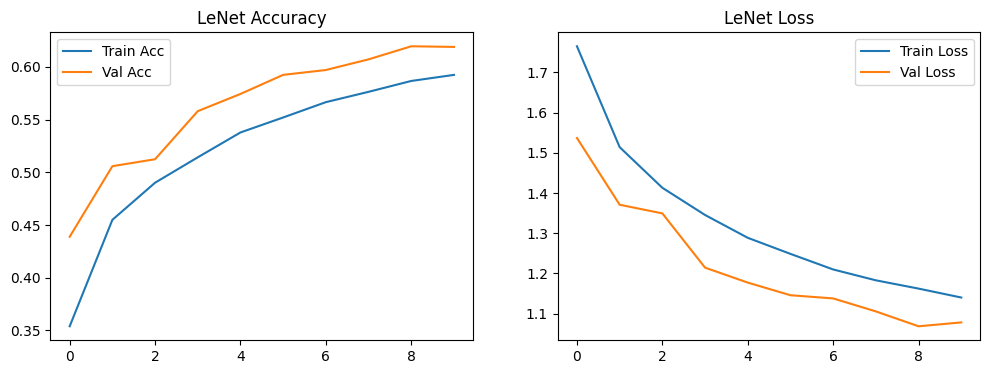

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19']
Received: inputs=Tensor(shape=(1, 32, 32, 3))
  warnings.warn(msg)


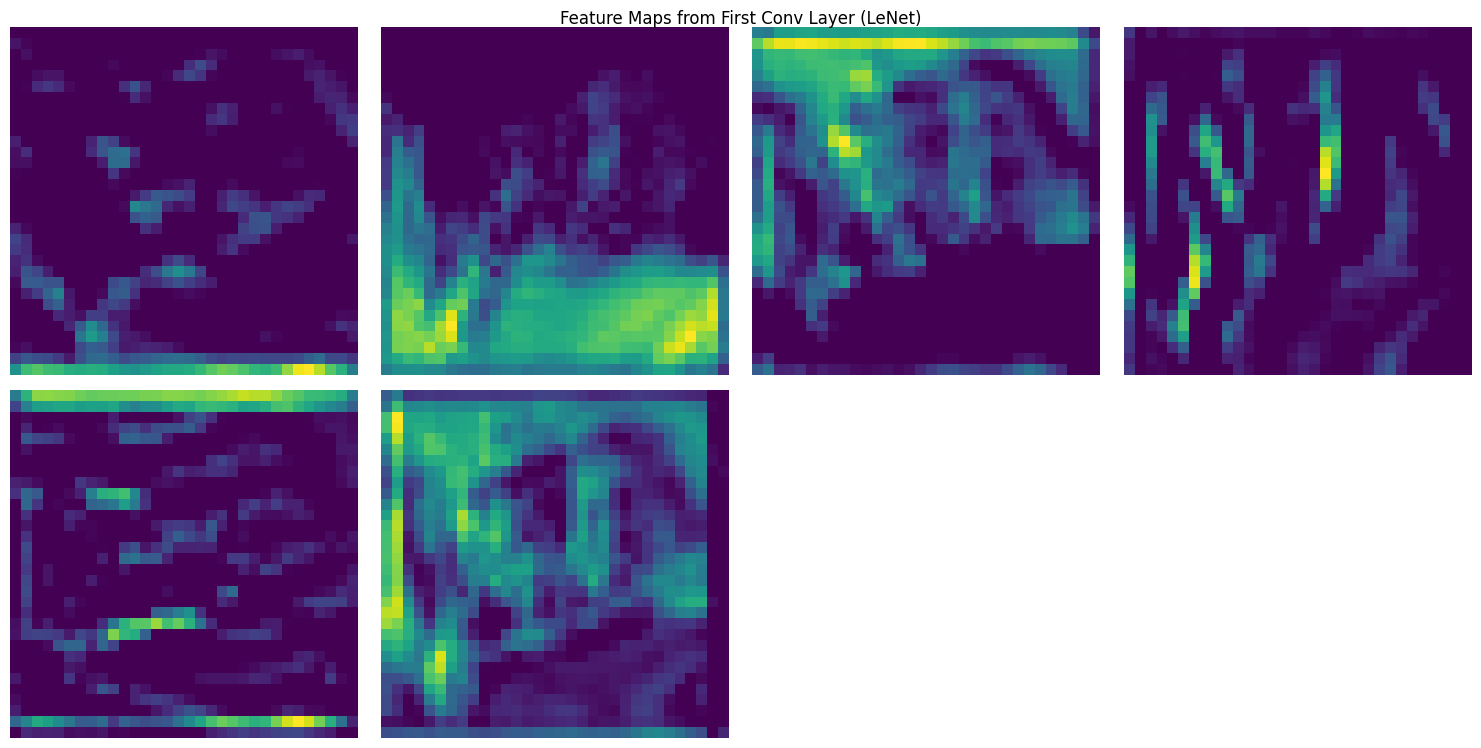

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ Load and preprocess CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 2️⃣ Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# 3️⃣ Define LeNet
def build_lenet():
    model = models.Sequential([
        layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 3), padding='same'),
        layers.AveragePooling2D((2, 2)),
        layers.Conv2D(16, (5, 5), activation='relu'),
        layers.AveragePooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dense(84, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# 4️⃣ Define AlexNet-style
def build_alexnet():
    model = models.Sequential([
        layers.Conv2D(96, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2),
        layers.Conv2D(384, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(384, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(2),
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

# 5️⃣ Train the model
def train_model(model, name):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                        epochs=10,
                        validation_data=(x_test, y_test))
    # Save results
    loss, acc = model.evaluate(x_test, y_test)
    print(f"\n{name} Test Accuracy: {acc*100:.2f}%")
    return model, history

# Choose model to train
model_choice = "lenet"  # or "alexnet"

if model_choice == "lenet":
    model = build_lenet()
    model_name = "LeNet"
else:
    model = build_alexnet()
    model_name = "AlexNet"

model, history = train_model(model, model_name)

# 6️⃣ Accuracy and Loss Graphs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title(f'{model_name} Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title(f'{model_name} Loss')
plt.legend()
plt.show()

# 7️⃣ Visualize Feature Maps (First Conv Layer)
# Create a new model that will output the feature maps from the first convolutional layer
activation_model = models.Model(inputs=model.input, outputs=model.layers[0].output)


# Select image to visualize
image = x_test[0].reshape(1, 32, 32, 3)
activations = activation_model.predict(image)

# First layer activations
first_layer_activation = activations
num_filters = first_layer_activation.shape[-1]

plt.figure(figsize=(15, 15))
for i in range(min(num_filters, 16)):
    plt.subplot(4, 4, i + 1)
    plt.imshow(first_layer_activation[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.suptitle(f"Feature Maps from First Conv Layer ({model_name})")
plt.tight_layout()
plt.show()